In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import matplotlib

matplotlib.rcParams['figure.figsize'] = (6, 6)
matplotlib.rcParams['image.cmap'] = 'gray'


[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


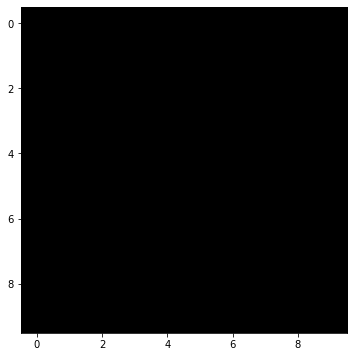

In [17]:
im = np.zeros((10, 10), dtype='uint8')
print(im)
plt.imshow(im)
imH, imW = im.shape[:2]

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]]


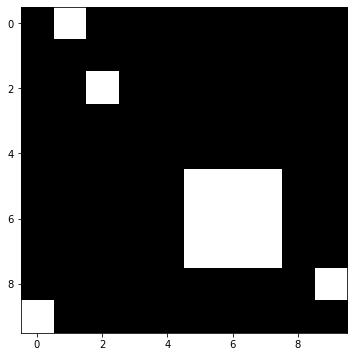

(10, 10)


In [18]:
im[0, 1] = 1
im[-1, 0] = 1
im[-2, -1] = 1
im[2, 2] = 1
im[5:8, 5:8] = 1

print(im)
plt.imshow(im);plt.show()
print(im.shape)
# frame = im[:,:,None]*1*np.empty(3,dtype='uint8')[None,None,:]
# # plt.imshow(frame);plt.show()
# frames = cv2.resize(frame,(50,50),interpolation=cv2.INTER_NEAREST)
# frames = cv2.cvtColor(frames[...,::-1],cv2.COLOR_RGB2GRAY)
# print(frames.shape)
# (thresh, im_bw) = cv2.threshold(frames, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# # plt.imshow(frames);plt.show()
# cv2.imwrite(f"im{1}{2}.jpg",im_bw)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


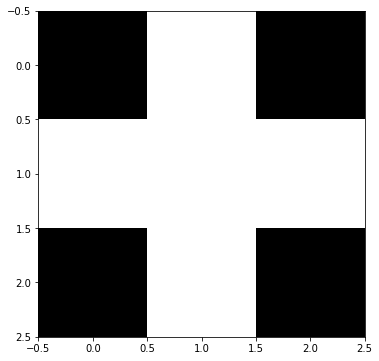

In [19]:
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
print(element)
plt.imshow(element)

kSize = element.shape[0]
height, width = im.shape[:2]

[[1 1 1 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 1]]


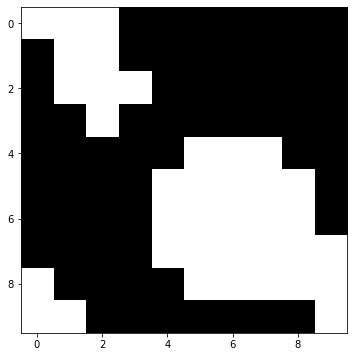

In [20]:
dilatedEllipseKernel = cv2.dilate(im, element)
print(dilatedEllipseKernel)
plt.imshow(dilatedEllipseKernel)

In [21]:
border = kSize // 2

# Create a padded image with zeros padding
paddedIm = np.zeros((height + border * 2, width + border * 2))
paddedIm = cv2.copyMakeBorder(im, border, border, border, border, cv2.BORDER_CONSTANT, value=0)
print(paddedIm)

frameWidth = int(50)
frameHeight = int(50)

out = cv2.VideoWriter(
    'method1.mp4',
    cv2.VideoWriter_fourcc('M','J','P','G'),
    10,
    (frameWidth,frameHeight)
)

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [22]:
for h_i in range(border, height + border):
    for w_i in range(border, width + border):
        if im[h_i - border, w_i - border]:
            paddedIm[h_i - border:h_i + border + 1, w_i - border:w_i + border + 1] = cv2.bitwise_or(
                paddedIm[h_i - border:h_i + border + 1, w_i - border:w_i + border + 1], element)
            # plt.imshow(paddedIm,cmap='gray');plt.show()
            frame = paddedIm[:,:,None]*1*np.empty(3,dtype='uint8')[None,None,:]
            # plt.imshow(frame);plt.show()
            frames = cv2.resize(frame,(50,50),interpolation=cv2.INTER_NEAREST)
            frames = cv2.cvtColor(frames,cv2.COLOR_BGR2GRAY)
            (thresh, im_bw) = cv2.threshold(frames, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
            frame3d = cv2.merge((im_bw,im_bw,im_bw))
            # print(frame3d.shape)
            # plt.imshow(frame3d);plt.show()
            # cv2.imwrite(f"frame_{h_i}{w_i}.jpg",frame)
            out.write(frame3d)
            cv2.waitKey(25)


out.release()

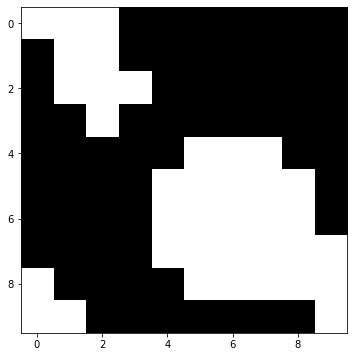

In [23]:
dilatedImage =  paddedIm[border:border+height,border:border+width]
plt.imshow(dilatedImage)


# inV = cv2.VideoCapture("method2.mp4")
#
# if not inV.isOpened():
#     print("Error opening video stream or file")
# else:
#     while inV.isOpened():
#         retval, image = inV.read()
#         if retval:
#             cv2.imshow("Read",image)
#             if cv2.waitKey(25) & 0xFF == ord('q'):
#                 break
#         else:
#             break
#
# inV.release()
# cv2.destroyAllWindows()
